# Imports

In [1]:
import sys
sys.path.append("../src/")

import random
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dataset Read In

In [2]:
df = pd.read_csv("../data/dataset_generated_by_extrucal.csv")
df

,extruder_size,metering_depth,polymer_density,rpm,screw_pitch,flight_width,number_flight,throughput
0,40,3.2,1100,70,64.0,7.2,1,39.648956
1,250,12.5,1400,80,400.0,35.0,2,7710.474531
2,60,1.2,900,40,72.0,10.8,2,9.871525
3,100,6.0,1100,50,180.0,18.0,2,308.711894
4,40,2.4,1200,20,48.0,3.2,2,6.880714
...,...,...,...,...,...,...,...,...
1505275,250,17.5,1400,20,350.0,30.0,1,2776.196206
1505276,230,13.8,1100,0,138.0,13.8,2,0.000000
1505277,220,8.8,1300,20,308.0,39.6,2,863.676713
1505278,100,5.0,1400,40,60.0,14.0,2,68.228337


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505280 entries, 0 to 1505279
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   extruder_size    1505280 non-null  int64  
 1   metering_depth   1505280 non-null  float64
 2   polymer_density  1505280 non-null  int64  
 3   rpm              1505280 non-null  int64  
 4   screw_pitch      1505280 non-null  float64
 5   flight_width     1505280 non-null  float64
 6   number_flight    1505280 non-null  int64  
 7   throughput       1505280 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 91.9 MB


In [4]:
df.nunique()

extruder_size           24
metering_depth         114
polymer_density          7
rpm                     10
screw_pitch            102
flight_width           116
number_flight            2
throughput         1354753
dtype: int64

# Data Distribution Check

## 1. Features

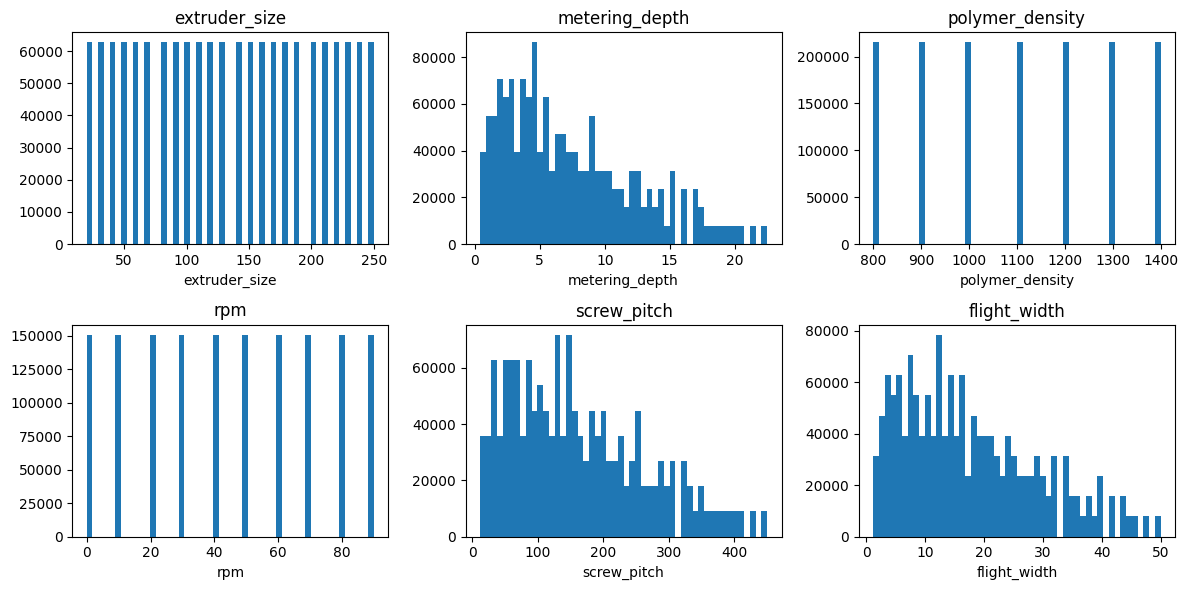

In [5]:
fig, axs = plt.subplots(figsize=(12, 6), nrows=2, ncols=3)
r = 0
c = 0
for feature in df.columns[:6]:
    axs[r, c].hist(df[feature], bins=50)
    axs[r, c].set_title(f"{feature}")
    axs[r, c].set_xlabel(f"{feature}")
    if c < 2:
        c += 1
    else:
        r += 1
        c = 0
plt.tight_layout()
plt.show();

#### After Log Transformation for `metering_depth`, `screw_pitch`, and `flight_width`

In [6]:
log_features = ["metering_depth", "screw_pitch", "flight_width"]

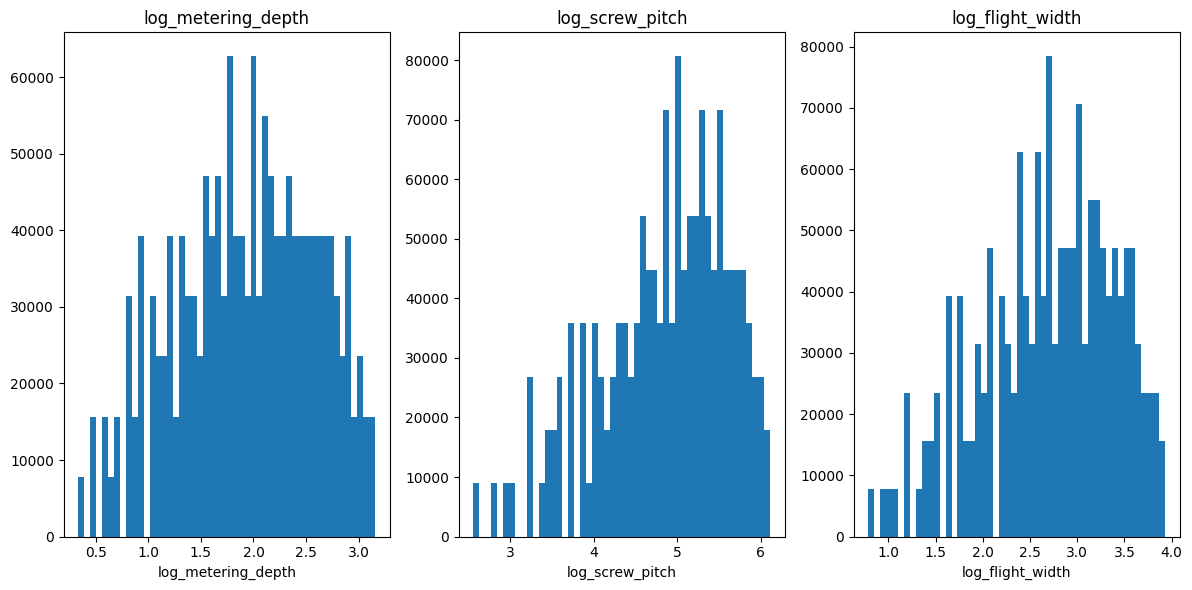

In [7]:
fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=3)
for i, feature in enumerate(log_features):
    axs[i].hist(np.log1p(df[feature]), bins=50)
    axs[i].set_title(f"log_{feature}")
    axs[i].set_xlabel(f"log_{feature}")
plt.tight_layout()
plt.show();

## 2. Target

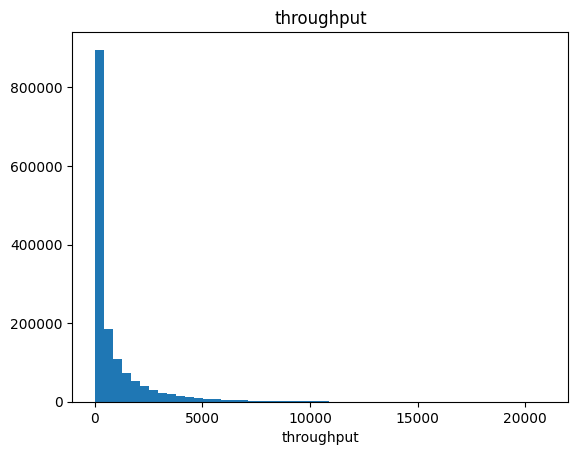

In [8]:
plt.figure()
plt.hist(df["throughput"], bins=50)
plt.title("throughput")
plt.xlabel("throughput")
plt.show();

#### After Log Transformation for `throughput`

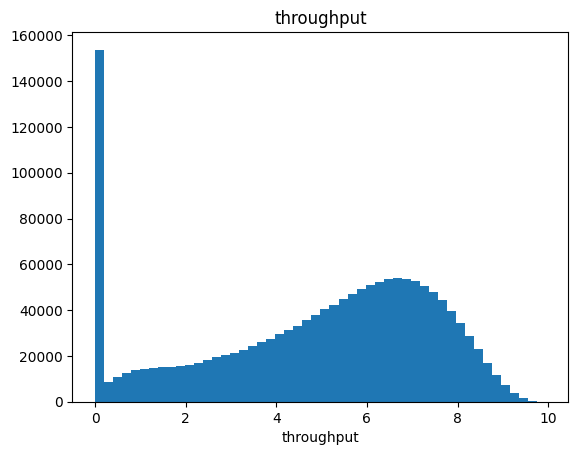

In [9]:
plt.figure()
plt.hist(np.log1p(df["throughput"]), bins=50)
plt.title("throughput")
plt.xlabel("throughput")
plt.show();

# Conclusion

#### Log-transformation will be applied to `metering_depth`, `screw_pitch`, `flight_width`, and `throughput`